In [2]:
import os
from datetime import datetime
#
# Variables individual crop





# Define dataset IDs as variables
dataset_id_crop = 62 
dataset_id_lv =  60  # LV segmentation stage
dataset_id_ips = 61  # Insertion points segmentation stage
fold = 2
trainer = 'nnUNetTrainerDA5_100epochs'

annotator = "HannumVol3specificNorm"
run = f"100EpochSpecficNorm_fold{fold}_all_withGTCrop_discoanddirvsagdataDataAugTrainerPAPERRESULTS"
log_file_path = f"{annotator}{run}.log"

input_dir = f"/home/sastocke/nnUNet/{annotator}TestDataPrepared/{annotator}TestDatasetCrop/imagesTr"
output_binary_masks = f"/home/sastocke/nnUNet/inferenceTest{annotator}/CropInference"

#in between processing:
output_image_folder = f"/home/sastocke/nnUNet/inferenceTest{annotator}/processedOutPut1/imagesTr"
inspection_folder = f"/home/sastocke/nnUNet/inferenceTest{annotator}/processedOutPut1/"

#Segmentation 2 -> LV
input_dir2 = f"/home/sastocke/nnUNet/inferenceTest{annotator}/processedOutPut1/imagesTr"
output_LV = f"/home/sastocke/nnUNet/inferenceTest{annotator}/OutputnnUnet2"

#Segmentatoin 3 -> IPs
output_IPs = f"/home/sastocke/nnUNet/inferenceTest{annotator}/OutputnnUnet2Ips"
pwd = os.getcwd()
# Set the environment variables

output_final = f"/home/sastocke/nnUNet/inferenceTest{annotator}/Output_Final_Combined"


pred_folder = f"/home/sastocke/nnUNet/inferenceTest{annotator}/Output_Final_Combined"
gt_folder = f"/home/sastocke/nnUNet/{annotator}TestDataPrepared/GT_{annotator}_Masks"
main_folder = "/home/sastocke/nnUNet/"


# Logging function for commands
def log_command(name, command, log_file_path):
    """Logs a command with a descriptive name and timestamp."""
    with open(log_file_path, "a") as log_file:
        timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        log_file.write(f"[{timestamp}] Stage: {name}\n")
        log_file.write(f"Command: {command}\n")
        log_file.write(f"Dataset ID: {command.split('-d ')[1].split()[0]}\n\n")  # Extract dataset ID dynamically


os.makedirs(input_dir, exist_ok=True)
os.makedirs(output_image_folder, exist_ok=True)
os.makedirs(inspection_folder, exist_ok=True)
os.makedirs(output_binary_masks, exist_ok=True)
os.makedirs(input_dir2, exist_ok=True)
os.makedirs(output_LV, exist_ok=True)
os.makedirs(output_IPs, exist_ok=True)
os.makedirs(output_final, exist_ok=True)
os.makedirs(gt_folder, exist_ok=True)

# Function to clear the contents of all inference output directories
# Function to clear the contents of all inference output directories without deleting the directories themselves
def clear_inference_output_dirs(directories):
    import os
    for directory in directories:
        if os.path.exists(directory):
            for file in os.listdir(directory):
                file_path = os.path.join(directory, file)
                try:
                    if os.path.isfile(file_path) or os.path.islink(file_path):
                        os.unlink(file_path)  # Remove file or symlink
                    elif os.path.isdir(file_path):
                        # Clear subdirectory contents recursively without deleting the subdirectory
                        for sub_file in os.listdir(file_path):
                            os.unlink(os.path.join(file_path, sub_file))
                except Exception as e:
                    print(f"Failed to delete {file_path}. Reason: {e}")
            print(f"Cleared contents of directory: {directory}")
        else:
            print(f"Directory does not exist: {directory}")

# Example usage:
inference_output_dirs = [
    output_binary_masks,
    output_image_folder,
    inspection_folder,
    output_LV,
    output_IPs,
    output_final
]
clear_inference_output_dirs(inference_output_dirs)




Cleared contents of directory: /home/sastocke/nnUNet/inferenceTestHannumVol3specificNorm/CropInference
Cleared contents of directory: /home/sastocke/nnUNet/inferenceTestHannumVol3specificNorm/processedOutPut1/imagesTr
Cleared contents of directory: /home/sastocke/nnUNet/inferenceTestHannumVol3specificNorm/processedOutPut1/
Cleared contents of directory: /home/sastocke/nnUNet/inferenceTestHannumVol3specificNorm/OutputnnUnet2
Cleared contents of directory: /home/sastocke/nnUNet/inferenceTestHannumVol3specificNorm/OutputnnUnet2Ips
Cleared contents of directory: /home/sastocke/nnUNet/inferenceTestHannumVol3specificNorm/Output_Final_Combined


In [3]:
#Crop inference

os.environ["nnUNet_raw"] = "/home/sastocke/nnUNet/nnUNet_raw"
os.environ["nnUNet_preprocessed"] = "/home/sastocke/nnUNet/nnUNet_preprocessed"
os.environ["nnUNet_results"] = "/home/sastocke/nnUNet/nnUNet_results"


#!nnUNetv2_predict -i /home/sastocke/nnUNet/inferenceTest/DataSet1Test -o /home/sastocke/nnUNet/inferenceTest/DataSet2OutputFromnnUnet1 -d 25 -c '2d'
os.system((f"nnUNetv2_predict -i {input_dir} -o {output_binary_masks}  -tr {trainer} --save_probabilities -d {dataset_id_crop} -c '2d' -f {fold}"))

crop_name = "Cropping Stage"
crop_command = f"nnUNetv2_predict -i {input_dir} -o {output_binary_masks} -tr {trainer} --save_probabilities -d {dataset_id_crop} -c '2d' -f {fold}"
log_command(crop_name, crop_command, log_file_path)
os.system(crop_command)


#!nnUNetv2_predict -i {input_dir} -o
#{output_binary_masks}  --save_probabilities -d 25 -c '2d' 


#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

There are 21 cases in the source folder
I am process 0 out of 1 (max process ID is 0, we start counting with 0!)
There are 21 cases that I would like to predict

Predicting HannumTestVol3DirvsAverages_Volunteer_03_DiVO_10_06_slice_001:
perform_everything_on_device: True


100%|██████████| 1/1 [00:00<00:00, 41.71it/s]


sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_DiVO_10_06_slice_001

Predicting HannumTestVol3DirvsAverages_Volunteer_03_DiVO_10_06_slice_002:
perform_everything_on_device: True
sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_DiVO_10_06_slice_002

Predicting HannumTestVol3DirvsAverages_Volunteer_03_DiVO_10_06_slice_003:
perform_everything_on_device: True


100%|██████████| 1/1 [00:00<00:00, 28.76it/s]


sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_DiVO_10_06_slice_003

Predicting HannumTestVol3DirvsAverages_Volunteer_03_DiVO_12_05_slice_001:
perform_everything_on_device: True
sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_DiVO_12_05_slice_001

Predicting HannumTestVol3DirvsAverages_Volunteer_03_DiVO_12_05_slice_002:
perform_everything_on_device: True


100%|██████████| 1/1 [00:00<00:00, 36.31it/s]


sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_DiVO_12_05_slice_002

Predicting HannumTestVol3DirvsAverages_Volunteer_03_DiVO_12_05_slice_003:
perform_everything_on_device: True
sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_DiVO_12_05_slice_003

Predicting HannumTestVol3DirvsAverages_Volunteer_03_DiVO_15_04_slice_001:
perform_everything_on_device: True


100%|██████████| 1/1 [00:00<00:00, 36.50it/s]


sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_DiVO_15_04_slice_001

Predicting HannumTestVol3DirvsAverages_Volunteer_03_DiVO_15_04_slice_002:
perform_everything_on_device: True
sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_DiVO_15_04_slice_002

Predicting HannumTestVol3DirvsAverages_Volunteer_03_DiVO_15_04_slice_003:
perform_everything_on_device: True


100%|██████████| 1/1 [00:00<00:00, 35.96it/s]


sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_DiVO_15_04_slice_003

Predicting HannumTestVol3DirvsAverages_Volunteer_03_DiVO_20_03_slice_001:
perform_everything_on_device: True
sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_DiVO_20_03_slice_001

Predicting HannumTestVol3DirvsAverages_Volunteer_03_DiVO_20_03_slice_002:
perform_everything_on_device: True


100%|██████████| 1/1 [00:00<00:00, 26.36it/s]


sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_DiVO_20_03_slice_002

Predicting HannumTestVol3DirvsAverages_Volunteer_03_DiVO_20_03_slice_003:
perform_everything_on_device: True
sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_DiVO_20_03_slice_003

Predicting HannumTestVol3DirvsAverages_Volunteer_03_DiVO_30_02_slice_001:
perform_everything_on_device: True


100%|██████████| 1/1 [00:00<00:00, 36.63it/s]


sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_DiVO_30_02_slice_001

Predicting HannumTestVol3DirvsAverages_Volunteer_03_DiVO_30_02_slice_002:
perform_everything_on_device: True
sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_DiVO_30_02_slice_002

Predicting HannumTestVol3DirvsAverages_Volunteer_03_DiVO_30_02_slice_003:
perform_everything_on_device: True


100%|██████████| 1/1 [00:00<00:00, 36.17it/s]


sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_DiVO_30_02_slice_003

Predicting HannumTestVol3DirvsAverages_Volunteer_03_MDDW_06_10_slice_001:
perform_everything_on_device: True
sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_MDDW_06_10_slice_001

Predicting HannumTestVol3DirvsAverages_Volunteer_03_MDDW_06_10_slice_002:
perform_everything_on_device: True


100%|██████████| 1/1 [00:00<00:00, 34.96it/s]


sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_MDDW_06_10_slice_002

Predicting HannumTestVol3DirvsAverages_Volunteer_03_MDDW_06_10_slice_003:
perform_everything_on_device: True
sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_MDDW_06_10_slice_003

Predicting HannumTestVol3DirvsAverages_Volunteer_03_MDDW_12_05_slice_001:
perform_everything_on_device: True


100%|██████████| 1/1 [00:00<00:00, 34.69it/s]


sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_MDDW_12_05_slice_001

Predicting HannumTestVol3DirvsAverages_Volunteer_03_MDDW_12_05_slice_002:
perform_everything_on_device: True
sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_MDDW_12_05_slice_002

Predicting HannumTestVol3DirvsAverages_Volunteer_03_MDDW_12_05_slice_003:
perform_everything_on_device: True


100%|██████████| 1/1 [00:00<00:00, 34.35it/s]


sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_MDDW_12_05_slice_003

#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

There are 21 cases in the source folder
I am process 0 out of 1 (max process ID is 0, we start counting with 0!)
There are 21 cases that I would like to predict

Predicting HannumTestVol3DirvsAverages_Volunteer_03_DiVO_10_06_slice_001:
perform_everything_on_device: True


100%|██████████| 1/1 [00:00<00:00, 36.27it/s]


sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_DiVO_10_06_slice_001

Predicting HannumTestVol3DirvsAverages_Volunteer_03_DiVO_10_06_slice_002:
perform_everything_on_device: True
sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_DiVO_10_06_slice_002

Predicting HannumTestVol3DirvsAverages_Volunteer_03_DiVO_10_06_slice_003:
perform_everything_on_device: True


100%|██████████| 1/1 [00:00<00:00, 29.80it/s]


sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_DiVO_10_06_slice_003

Predicting HannumTestVol3DirvsAverages_Volunteer_03_DiVO_12_05_slice_001:
perform_everything_on_device: True
sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_DiVO_12_05_slice_001

Predicting HannumTestVol3DirvsAverages_Volunteer_03_DiVO_12_05_slice_002:
perform_everything_on_device: True


100%|██████████| 1/1 [00:00<00:00, 26.71it/s]


sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_DiVO_12_05_slice_002

Predicting HannumTestVol3DirvsAverages_Volunteer_03_DiVO_12_05_slice_003:
perform_everything_on_device: True
sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_DiVO_12_05_slice_003

Predicting HannumTestVol3DirvsAverages_Volunteer_03_DiVO_15_04_slice_001:
perform_everything_on_device: True


100%|██████████| 1/1 [00:00<00:00, 26.79it/s]


sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_DiVO_15_04_slice_001

Predicting HannumTestVol3DirvsAverages_Volunteer_03_DiVO_15_04_slice_002:
perform_everything_on_device: True
sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_DiVO_15_04_slice_002

Predicting HannumTestVol3DirvsAverages_Volunteer_03_DiVO_15_04_slice_003:
perform_everything_on_device: True


100%|██████████| 1/1 [00:00<00:00, 30.19it/s]


sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_DiVO_15_04_slice_003

Predicting HannumTestVol3DirvsAverages_Volunteer_03_DiVO_20_03_slice_001:
perform_everything_on_device: True
sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_DiVO_20_03_slice_001

Predicting HannumTestVol3DirvsAverages_Volunteer_03_DiVO_20_03_slice_002:
perform_everything_on_device: True


100%|██████████| 1/1 [00:00<00:00, 30.13it/s]


sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_DiVO_20_03_slice_002

Predicting HannumTestVol3DirvsAverages_Volunteer_03_DiVO_20_03_slice_003:
perform_everything_on_device: True
sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_DiVO_20_03_slice_003

Predicting HannumTestVol3DirvsAverages_Volunteer_03_DiVO_30_02_slice_001:
perform_everything_on_device: True


100%|██████████| 1/1 [00:00<00:00, 30.19it/s]


sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_DiVO_30_02_slice_001

Predicting HannumTestVol3DirvsAverages_Volunteer_03_DiVO_30_02_slice_002:
perform_everything_on_device: True
sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_DiVO_30_02_slice_002

Predicting HannumTestVol3DirvsAverages_Volunteer_03_DiVO_30_02_slice_003:
perform_everything_on_device: True


100%|██████████| 1/1 [00:00<00:00, 29.77it/s]


sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_DiVO_30_02_slice_003

Predicting HannumTestVol3DirvsAverages_Volunteer_03_MDDW_06_10_slice_001:
perform_everything_on_device: True
sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_MDDW_06_10_slice_001

Predicting HannumTestVol3DirvsAverages_Volunteer_03_MDDW_06_10_slice_002:
perform_everything_on_device: True


100%|██████████| 1/1 [00:00<00:00, 29.38it/s]


sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_MDDW_06_10_slice_002

Predicting HannumTestVol3DirvsAverages_Volunteer_03_MDDW_06_10_slice_003:
perform_everything_on_device: True
sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_MDDW_06_10_slice_003

Predicting HannumTestVol3DirvsAverages_Volunteer_03_MDDW_12_05_slice_001:
perform_everything_on_device: True


100%|██████████| 1/1 [00:00<00:00, 24.86it/s]


sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_MDDW_12_05_slice_001

Predicting HannumTestVol3DirvsAverages_Volunteer_03_MDDW_12_05_slice_002:
perform_everything_on_device: True
sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_MDDW_12_05_slice_002

Predicting HannumTestVol3DirvsAverages_Volunteer_03_MDDW_12_05_slice_003:
perform_everything_on_device: True


100%|██████████| 1/1 [00:00<00:00, 26.72it/s]


sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_MDDW_12_05_slice_003


0

mask_file : /home/sastocke/nnUNet/inferenceTestHannumVol3specificNorm/CropInference/HannumTestVol3DirvsAverages_Volunteer_03_DiVO_20_03_slice_003.nii.gz
[make_square_crop] bounding box (square):
  x_min=62, x_max=148, y_min=27, y_max=113, side_length=86, scale_factor=0.3359375
Processed and saved HannumTestVol3DirvsAverages_Volunteer_03_DiVO_20_03_slice_003_0000 to _0003.nii.gz.
Dice score (inference vs GT) = 0.9515
mask_file : /home/sastocke/nnUNet/inferenceTestHannumVol3specificNorm/CropInference/HannumTestVol3DirvsAverages_Volunteer_03_MDDW_06_10_slice_003.nii.gz
[make_square_crop] bounding box (square):
  x_min=63, x_max=151, y_min=25, y_max=113, side_length=88, scale_factor=0.34375
Processed and saved HannumTestVol3DirvsAverages_Volunteer_03_MDDW_06_10_slice_003_0000 to _0003.nii.gz.
Dice score (inference vs GT) = 0.9695
mask_file : /home/sastocke/nnUNet/inferenceTestHannumVol3specificNorm/CropInference/HannumTestVol3DirvsAverages_Volunteer_03_DiVO_30_02_slice_001.nii.gz
[make_squ

Processed and saved HannumTestVol3DirvsAverages_Volunteer_03_DiVO_15_04_slice_002_0000 to _0003.nii.gz.
Dice score (inference vs GT) = 0.9276
mask_file : /home/sastocke/nnUNet/inferenceTestHannumVol3specificNorm/CropInference/HannumTestVol3DirvsAverages_Volunteer_03_DiVO_15_04_slice_003.nii.gz
[make_square_crop] bounding box (square):
  x_min=67, x_max=154, y_min=25, y_max=112, side_length=87, scale_factor=0.33984375
Processed and saved HannumTestVol3DirvsAverages_Volunteer_03_DiVO_15_04_slice_003_0000 to _0003.nii.gz.
Dice score (inference vs GT) = 0.9352
mask_file : /home/sastocke/nnUNet/inferenceTestHannumVol3specificNorm/CropInference/HannumTestVol3DirvsAverages_Volunteer_03_DiVO_12_05_slice_001.nii.gz
[make_square_crop] bounding box (square):
  x_min=68, x_max=140, y_min=36, y_max=108, side_length=72, scale_factor=0.28125
Processed and saved HannumTestVol3DirvsAverages_Volunteer_03_DiVO_12_05_slice_001_0000 to _0003.nii.gz.
Dice score (inference vs GT) = 0.9297
mask_file : /home/s

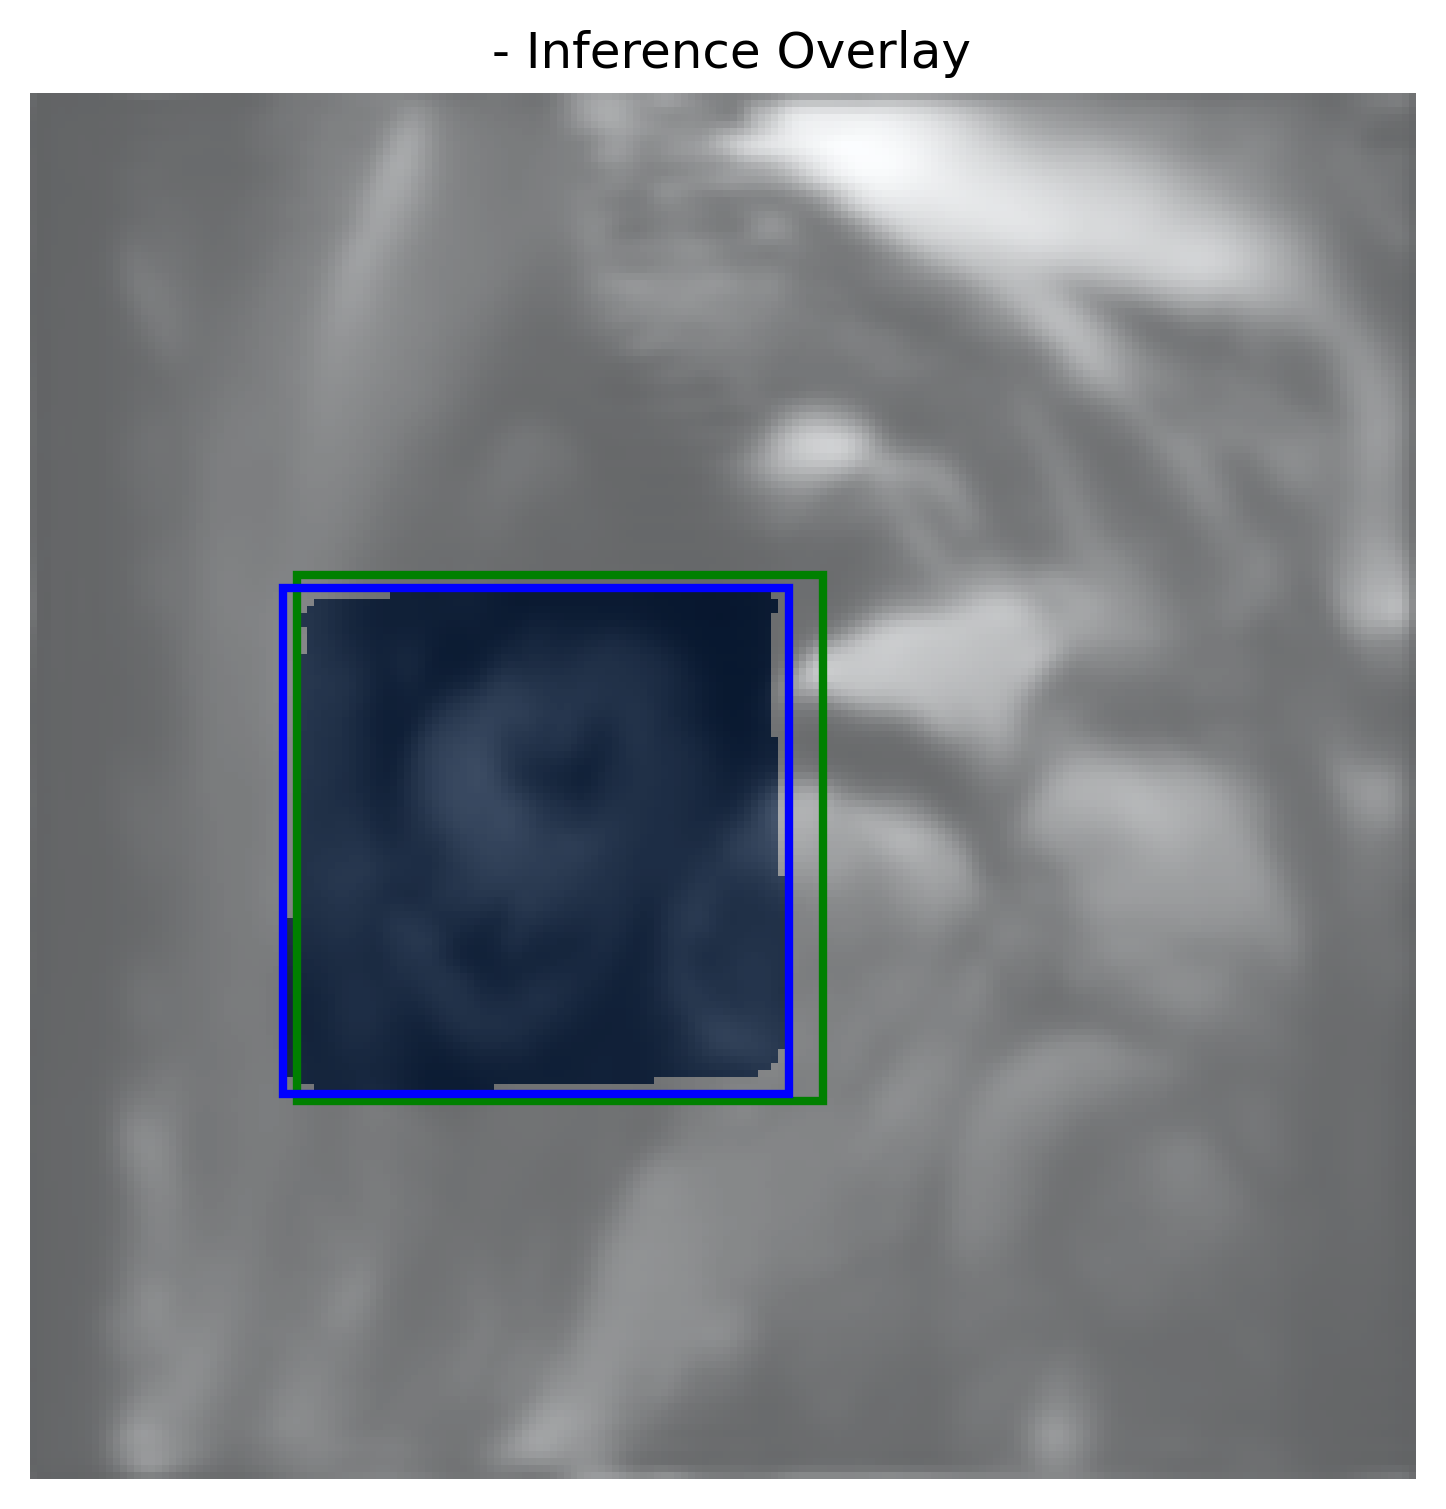

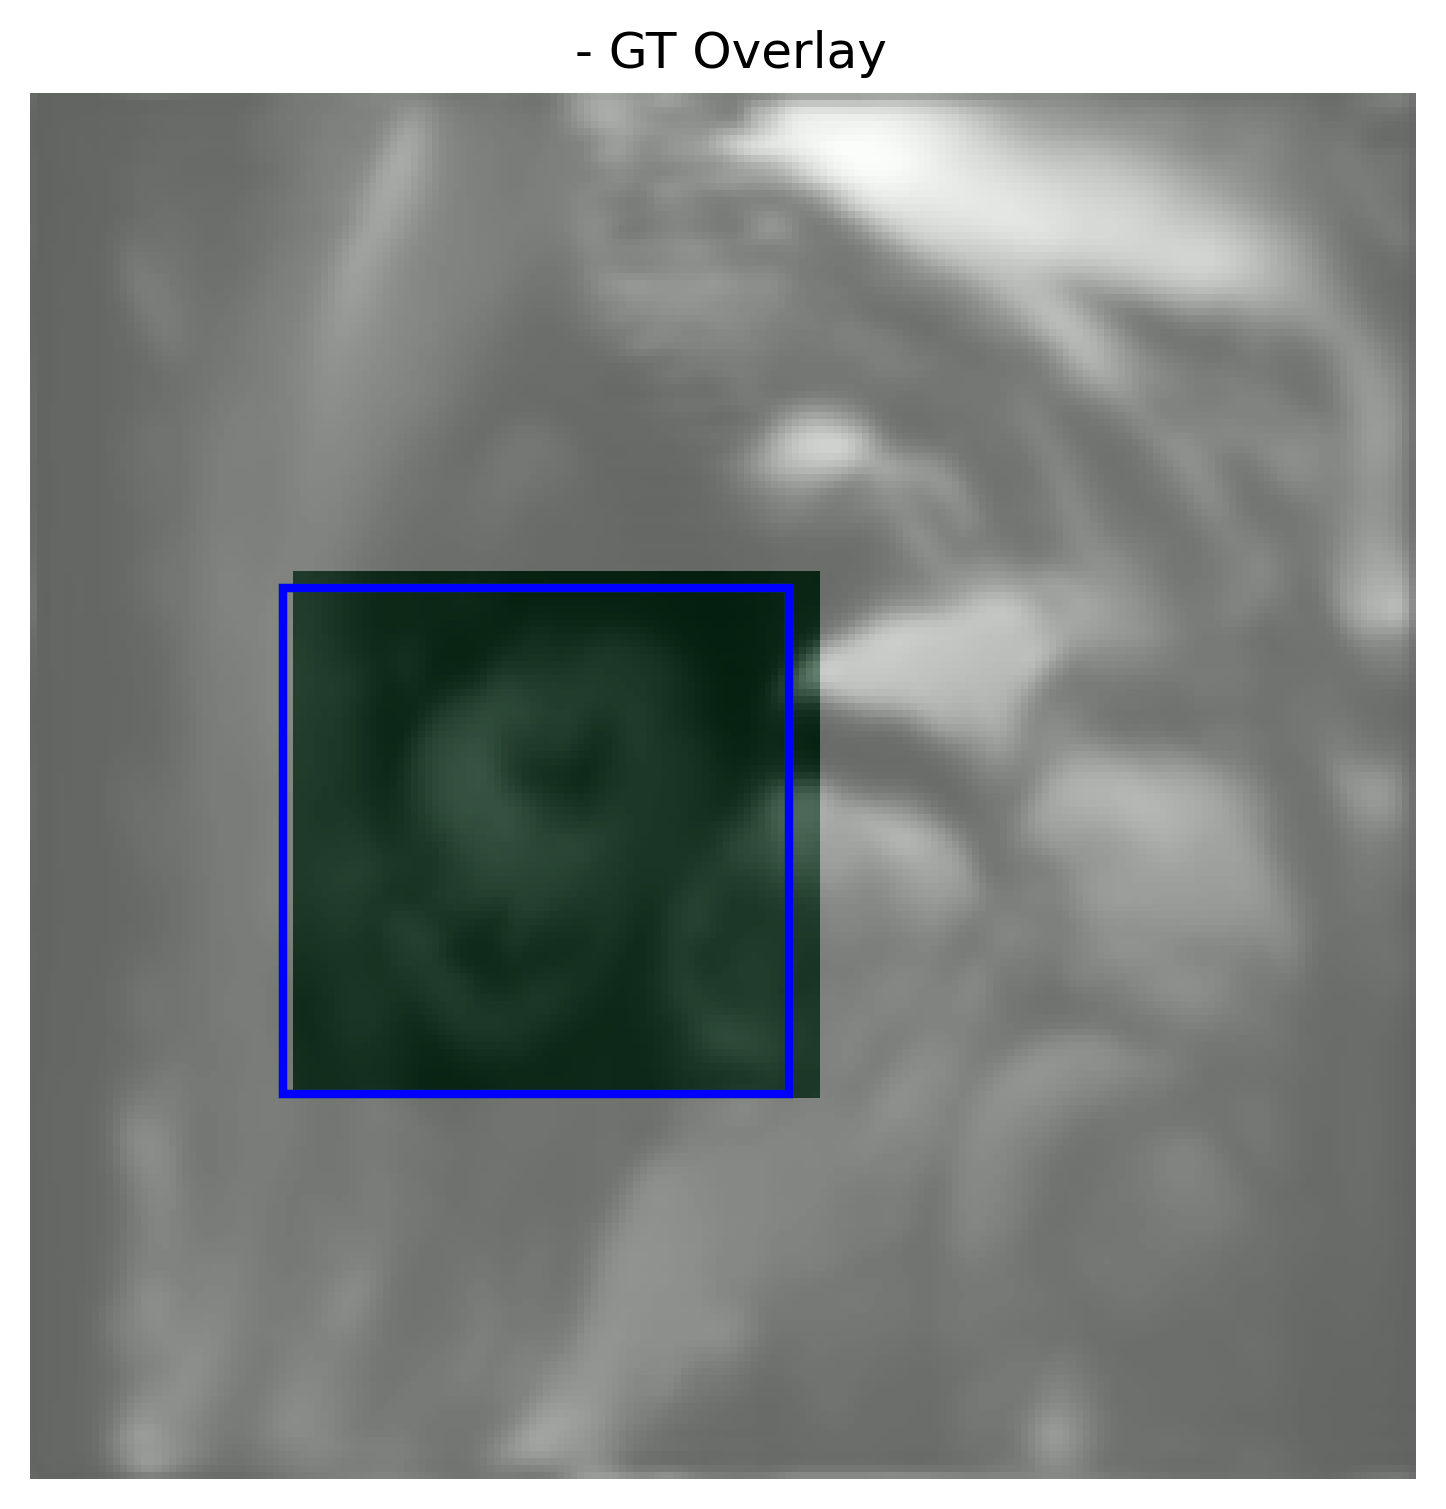

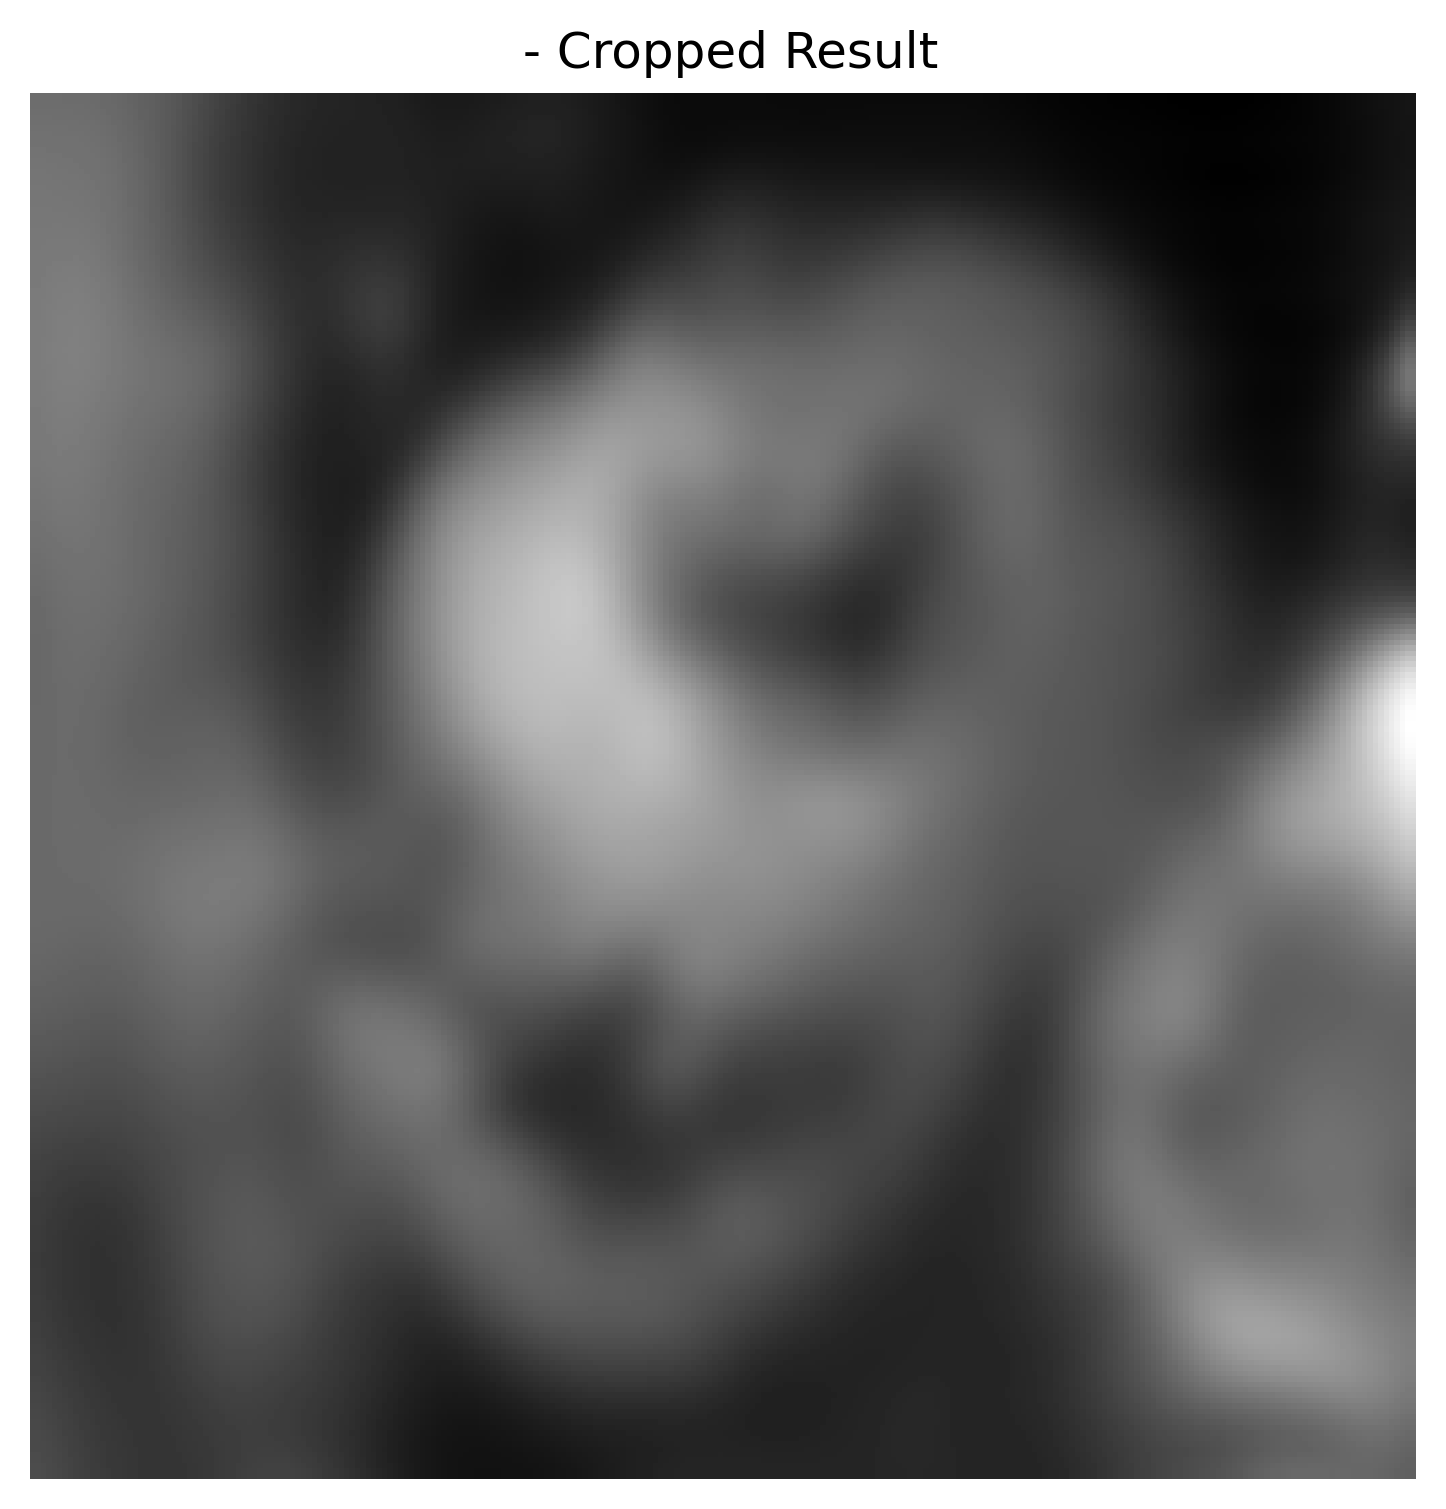

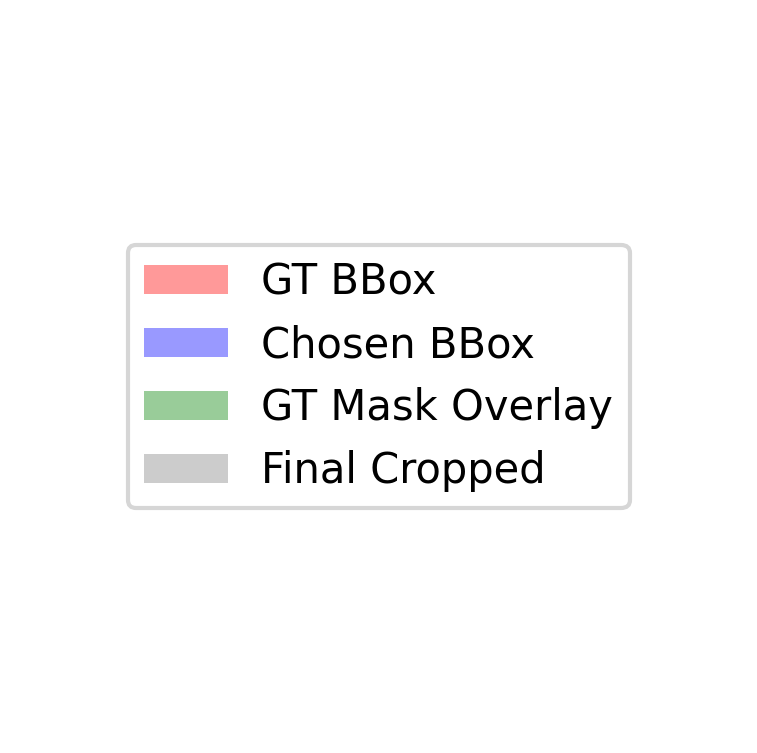

In [ ]:
import os
import numpy as np
import nibabel as nib
import cv2
import matplotlib.pyplot as plt
from eval_util import dice_score_original

metrics_data=[] 

# Ensure output folders exist


# Interpolation size
interpolation_size = 256


def normalize_avg_data(image):
    image_min = np.min(image)
    image_max = np.max(image)
    return (image - image_min) / (image_max - image_min)

def normalize_mean_diff_data(image):
    image_min = 0
    image_max = 4
    return (image - image_min) / (image_max)

def normalize_eigenvector_data(image):
    image_min = 0
    image_max = 2
    return (image - image_min) / (image_max)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def make_square_crop(mask, target_size=256):
    """
    Computes a square bounding box around the non-zero pixels of 'mask'.
    Returns x_min, x_max, y_min, y_max, and scale_factor.
    """
    coords = np.argwhere(mask > 0)
    x_min, y_min = coords.min(axis=0)
    x_max, y_max = coords.max(axis=0) + 1

    side_length = max(x_max - x_min, y_max - y_min)

    center_x = (x_min + x_max) // 2
    center_y = (y_min + y_max) // 2

    x_min = max(0, center_x - side_length // 2)
    x_max = x_min + side_length

    y_min = max(0, center_y - side_length // 2)
    y_max = y_min + side_length

    scale_factor = side_length / target_size
    print("[make_square_crop] bounding box (square):")
    print(f"  x_min={x_min}, x_max={x_max}, y_min={y_min}, y_max={y_max}, side_length={side_length}, scale_factor={scale_factor}")

    return x_min, x_max, y_min, y_max, scale_factor


def plot_inspection_with_separate_legend(
    chosen_mask,         # Used for the "blue" bounding box
    inference_mask,      # Visualization mask in semi-transparent blue
    gt_mask,             # Visualization mask in semi-transparent green
    original_image,
    cropped_result,
    x_min, x_max,        # Coordinates for the "red" bounding box
    y_min, y_max,
    title,
    output_path,         # Base path for the 3 main figures
    legend_output_path   # Path for the separate legend figure
):
    """
    Creates three separate figures (all the same size, e.g., (10, 6), dpi=300):
      1) Original image with:
         - Red bounding box: (x_min..x_max, y_min..y_max)
         - Blue bounding box: from make_square_crop(chosen_mask)
         - Blue overlay: inference_mask
      2) Original image with the same bounding boxes, plus green overlay (gt_mask)
      3) Final cropped result
    And a fourth figure for the legend (saved to legend_output_path).
    """

    # Helper to normalize the image for display
    def normalize_avg_data(img):
        img_min, img_max = img.min(), img.max()
        if img_max > img_min:
            return (img - img_min) / (img_max - img_min)
        else:
            return img

    original_normalized = normalize_avg_data(original_image)
    cropped_normalized  = normalize_avg_data(cropped_result)

    # Convert inference & GT masks to binary
    if inference_mask is not None:
        inf_mask_bin = (inference_mask > 0).astype(np.uint8)
    else:
        inf_mask_bin = np.zeros_like(original_image, dtype=np.uint8)

    if gt_mask is not None:
        gt_mask_bin = (gt_mask > 0).astype(np.uint8)
    else:
        gt_mask_bin = np.zeros_like(original_image, dtype=np.uint8)

    # ---------------------------------------------------------------------
    # Compute the bounding box (square) from chosen_mask => Blue bounding box
    # ---------------------------------------------------------------------
    x_min_sq, x_max_sq, y_min_sq, y_max_sq, scale_factor_chosen = make_square_crop(chosen_mask)

    # ---------------------------------------------------------------------
    # Define filenames for the 3 main figures using the single output_path
    # ---------------------------------------------------------------------
    out_inference_path = output_path.replace('.png','_inference.png')
    out_gt_path        = output_path.replace('.png','_gt.png')
    out_cropped_path   = output_path.replace('.png','_cropped.png')
    # If your output_path has a different extension (e.g. ".jpg"), adjust accordingly.

    # =========================================================================
    # FIGURE 1: Original + red bounding box + blue bounding box + inference overlay
    # =========================================================================
    plt.figure(figsize=(10, 6), dpi=300)
    plt.imshow(original_normalized, cmap='gray')

    x_min_gt, x_max_gt, y_min_gt, y_max_gt, _ = make_square_crop(gt_mask)
    rect_red = mpatches.Rectangle(
        (y_min_gt, x_min_gt),
        (y_max_gt - y_min_gt),
        (x_max_gt - x_min_gt),
        linewidth=2,
        edgecolor='red',
        facecolor='none'
    )
    plt.gca().add_patch(rect_red)

    # Blue bounding box (square from chosen_mask)
    rect_blue = mpatches.Rectangle(
        (y_min_sq, x_min_sq),
        (y_max_sq - y_min_sq),
        (x_max_sq - x_min_sq),
        linewidth=2,
        edgecolor='blue',
        facecolor='none'
    )
    plt.gca().add_patch(rect_blue)

    # Overlay inference in semi-transparent blue
    plt.imshow(inf_mask_bin, cmap='Blues', alpha=0.4)

    plt.title(f"{title} - Inference Overlay")
    plt.axis('off')
    plt.savefig(out_inference_path, bbox_inches='tight')
    plt.show()
    plt.close()

    # =========================================================================
    # FIGURE 2: Original + red bounding box + blue bounding box + GT overlay
    # =========================================================================
    plt.figure(figsize=(10, 6), dpi=300)
    plt.imshow(original_normalized, cmap='gray')

    # Red bounding box
    rect_red_2 = mpatches.Rectangle(
        (y_min, x_min),
        (y_max - y_min),
        (x_max - x_min),
        linewidth=2,
        edgecolor='red',
        facecolor='none'
    )
    plt.gca().add_patch(rect_red_2)

    # Blue bounding box (square)
    rect_blue_2 = mpatches.Rectangle(
        (y_min_sq, x_min_sq),
        (y_max_sq - y_min_sq),
        (x_max_sq - x_min_sq),
        linewidth=2,
        edgecolor='blue',
        facecolor='none'
    )
    plt.gca().add_patch(rect_blue_2)

    # Overlay GT in semi-transparent green
    plt.imshow(gt_mask_bin, cmap='Greens', alpha=0.4)

    plt.title(f"{title} - GT Overlay")
    plt.axis('off')
    plt.savefig(out_gt_path, bbox_inches='tight')
    plt.show()
    plt.close()

    # =========================================================================
    # FIGURE 3: Final cropped result
    # =========================================================================
    plt.figure(figsize=(10, 6), dpi=300)
    plt.imshow(cropped_normalized, cmap='gray')
    plt.title(f"{title} - Cropped Result")
    plt.axis('off')
    plt.savefig(out_cropped_path, bbox_inches='tight')
    plt.show()
    plt.close()

    # =========================================================================
    # FIGURE 4: Legend (only)
    # =========================================================================
    fig_legend, ax_legend = plt.subplots(figsize=(3,3), dpi=300)

    # Example patches
    red_patch   = mpatches.Patch(facecolor='red',   alpha=0.4, label='GT BBox')
    blue_patch  = mpatches.Patch(facecolor='blue',  alpha=0.4, label='Chosen BBox')
    green_patch = mpatches.Patch(facecolor='green', alpha=0.4, label='GT Mask Overlay')
    gray_patch  = mpatches.Patch(facecolor='gray',  alpha=0.4, label='Final Cropped')
    # For inference overlay, if you want a distinct label, you can do:
    # blue_inf_patch = mpatches.Patch(facecolor='blue', alpha=0.2, label='Inference Overlay')

    legend_patches = [red_patch, blue_patch, green_patch, gray_patch]
    ax_legend.legend(handles=legend_patches, loc='center', borderaxespad=0.5)
    ax_legend.axis('off')
    plt.title("")

    plt.savefig(legend_output_path, bbox_inches='tight')
    plt.show()
    plt.close()



#quickfix to check if cropping introduces shift!

gt_crop = False


for mask_filename in os.listdir(output_binary_masks):
    if mask_filename.endswith('.nii.gz'):
        try:
            parts = mask_filename.rstrip('.nii.gz').split('_')
            root_folder = parts[0]
            volunteer_folder = f"{parts[1]}_{parts[2]}"
            divo_folder = f"{parts[3]}_{parts[4]}_{parts[5]}"
            slice_idx = parts[7]
            # Inference mask path
            inference_mask_path = os.path.join(output_binary_masks, mask_filename)

            # Ground-truth mask path
            divo_path = f"{root_folder}/{volunteer_folder}/Distortion_Corrected/{divo_folder}"
            mask_folder = os.path.join(divo_path, "02_Crop_Masks")
            gt_mask_path = os.path.join(mask_folder, f"Square_Crop_Mask_Slice_{slice_idx}.nii")  # or .nii.gz?

            # Decide which mask to use for cropping
            if gt_crop:
                mask_file_path = gt_mask_path
            else:
                mask_file_path = inference_mask_path
            print(f'mask_file : {mask_file_path}')

            # Build image folder paths
            image_folder = os.path.join(divo_path, "03_Segmentation_Images")
            avg_image_file = os.path.join(pwd, image_folder, f"Average_Diffusion_Weighted_Image_Slice_{slice_idx}.nii")
            mean_diff_file = os.path.join(pwd, image_folder, f"Mean_Diffusivty_Image_Slice_{slice_idx}.nii")
            eigenvector_file = os.path.join(pwd, image_folder, f"Primary_Eigenvector_Image_Slice_{slice_idx}.nii")
            FA_file = os.path.join(pwd, image_folder, f"Fractional_Anisotropy_Image_Slice_{slice_idx}.nii")

            # Make sure all the main images exist
            if all(os.path.exists(f) for f in [avg_image_file, mean_diff_file, eigenvector_file, FA_file]):
                # Load images
                avg_image = nib.load(avg_image_file).get_fdata()
                mean_diff_image = nib.load(mean_diff_file).get_fdata()
                eigenvector_image = nib.load(eigenvector_file).get_fdata()
                FA_image = nib.load(FA_file).get_fdata()

                # Load chosen mask for cropping
                chosen_mask = nib.load(mask_file_path).get_fdata()

                # Also load GT & inference masks (for DSC)
                # (If one is missing, we'll just record NaN for DSC.)
                dice_val = np.nan
                if os.path.exists(inference_mask_path) and os.path.exists(gt_mask_path):
                    inference_mask = nib.load(inference_mask_path).get_fdata()
                    gt_mask = nib.load(gt_mask_path).get_fdata()
                    dice_val = dice_score_original(gt_mask, inference_mask, label=1)

                # Determine the bounding box on the chosen mask
                x_min, x_max, y_min, y_max, scale_factor = make_square_crop(chosen_mask)

                # Crop each image
                avg_cropped = avg_image[x_min:x_max, y_min:y_max]
                mean_diff_cropped = mean_diff_image[x_min:x_max, y_min:y_max]
                eigenvector_cropped = (
                    eigenvector_image[x_min:x_max, y_min:y_max, 0]
                    + eigenvector_image[x_min:x_max, y_min:y_max, 1]
                )
                FA_cropped = FA_image[x_min:x_max, y_min:y_max]

                # Resize each image
                avg_resized = cv2.resize(avg_cropped, (interpolation_size, interpolation_size), interpolation=cv2.INTER_LINEAR)
                mean_diff_resized = cv2.resize(mean_diff_cropped, (interpolation_size, interpolation_size), interpolation=cv2.INTER_LINEAR)
                eigenvector_resized = cv2.resize(eigenvector_cropped, (interpolation_size, interpolation_size), interpolation=cv2.INTER_LINEAR)
                FA_resized = cv2.resize(FA_cropped, (interpolation_size, interpolation_size), interpolation=cv2.INTER_LINEAR)

                # Build common name
                common_name_id = f"{root_folder}_{volunteer_folder}_{divo_folder}_slice_{slice_idx}"

                # Normalize as needed
                avg_resized = normalize_avg_data(avg_resized)
                mean_diff_resized = normalize_mean_diff_data(mean_diff_resized)
                eigenvector_resized = normalize_eigenvector_data(eigenvector_resized)


                # Save the images: IF different image configurations are needed, toggle comment out the desired ones
                #AVG only etc.!
                nib.save(nib.Nifti1Image(avg_resized, np.eye(4)),
                         os.path.join(output_image_folder, f"{common_name_id}_0000.nii.gz"))
                nib.save(nib.Nifti1Image(mean_diff_resized, np.eye(4)),
                        os.path.join(output_image_folder, f"{common_name_id}_0001.nii.gz"))
                nib.save(nib.Nifti1Image(eigenvector_resized, np.eye(4)),
                        os.path.join(output_image_folder, f"{common_name_id}_0002.nii.gz"))
                nib.save(nib.Nifti1Image(FA_resized, np.eye(4)),
                         os.path.join(output_image_folder, f"{common_name_id}_0003.nii.gz"))

                # Generate inspection plots
                inspection_file_path = os.path.join(inspection_folder, f"{common_name_id}_inspection.png")
                


            


                # Record metrics (you can store more/less info as you like)
                metrics_data.append({
                    "Case ID": common_name_id,
                    "Dice Crop": dice_val
                })

                print(f"Processed and saved {common_name_id}_0000 to _0003.nii.gz.")
                print(f"Dice score (inference vs GT) = {dice_val:.4f}")
            else:
                print(f"Missing files for slice {slice_idx} in {divo_folder}")
        except ValueError:
            print(f"Filename format does not match expected pattern: {mask_filename}")

plot_inspection_with_separate_legend(
    chosen_mask=chosen_mask,
    inference_mask=inference_mask,
    gt_mask=gt_mask,
    original_image=avg_image,
    cropped_result=avg_resized,
    x_min=x_min, x_max=x_max,
    y_min=y_min, y_max=y_max,
    title="",
    output_path="my_plot.png", 
    legend_output_path="my_legend.png"
            )

In [5]:
# Set the environment variables
os.environ["nnUNet_raw"] = "/home/sastocke/nnUNet/nnUNet_raw"
os.environ["nnUNet_preprocessed"] = "/home/sastocke/nnUNet/nnUNet_preprocessed"
os.environ["nnUNet_results"] = "/home/sastocke/nnUNet/nnUNet_results"


os.system((f"nnUNetv2_predict -i {input_dir2} -o {output_LV} -tr {trainer} --save_probabilities -d {dataset_id_lv} -c '2d'  -f {fold}"))


#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

There are 21 cases in the source folder
I am process 0 out of 1 (max process ID is 0, we start counting with 0!)
There are 21 cases that I would like to predict

Predicting HannumTestVol3DirvsAverages_Volunteer_03_DiVO_10_06_slice_001:
perform_everything_on_device: True


100%|██████████| 1/1 [00:00<00:00, 31.97it/s]


sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_DiVO_10_06_slice_001

Predicting HannumTestVol3DirvsAverages_Volunteer_03_DiVO_10_06_slice_002:
perform_everything_on_device: True
sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_DiVO_10_06_slice_002

Predicting HannumTestVol3DirvsAverages_Volunteer_03_DiVO_10_06_slice_003:
perform_everything_on_device: True


  0%|          | 0/1 [00:00<?, ?it/s]

sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_DiVO_10_06_slice_003

Predicting HannumTestVol3DirvsAverages_Volunteer_03_DiVO_12_05_slice_001:
perform_everything_on_device: True
sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_DiVO_12_05_slice_001

Predicting HannumTestVol3DirvsAverages_Volunteer_03_DiVO_12_05_slice_002:
perform_everything_on_device: True


100%|██████████| 1/1 [00:00<00:00, 29.75it/s]


sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_DiVO_12_05_slice_002

Predicting HannumTestVol3DirvsAverages_Volunteer_03_DiVO_12_05_slice_003:
perform_everything_on_device: True
sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_DiVO_12_05_slice_003

Predicting HannumTestVol3DirvsAverages_Volunteer_03_DiVO_15_04_slice_001:
perform_everything_on_device: True


100%|██████████| 1/1 [00:00<00:00, 30.81it/s]


sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_DiVO_15_04_slice_001

Predicting HannumTestVol3DirvsAverages_Volunteer_03_DiVO_15_04_slice_002:
perform_everything_on_device: True
sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_DiVO_15_04_slice_002

Predicting HannumTestVol3DirvsAverages_Volunteer_03_DiVO_15_04_slice_003:
perform_everything_on_device: True


100%|██████████| 1/1 [00:00<00:00, 30.38it/s]


sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_DiVO_15_04_slice_003

Predicting HannumTestVol3DirvsAverages_Volunteer_03_DiVO_20_03_slice_001:
perform_everything_on_device: True
sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_DiVO_20_03_slice_001

Predicting HannumTestVol3DirvsAverages_Volunteer_03_DiVO_20_03_slice_002:
perform_everything_on_device: True


100%|██████████| 1/1 [00:00<00:00, 30.04it/s]


sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_DiVO_20_03_slice_002

Predicting HannumTestVol3DirvsAverages_Volunteer_03_DiVO_20_03_slice_003:
perform_everything_on_device: True
sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_DiVO_20_03_slice_003

Predicting HannumTestVol3DirvsAverages_Volunteer_03_DiVO_30_02_slice_001:
perform_everything_on_device: True


100%|██████████| 1/1 [00:00<00:00, 29.75it/s]


sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_DiVO_30_02_slice_001

Predicting HannumTestVol3DirvsAverages_Volunteer_03_DiVO_30_02_slice_002:
perform_everything_on_device: True
sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_DiVO_30_02_slice_002

Predicting HannumTestVol3DirvsAverages_Volunteer_03_DiVO_30_02_slice_003:
perform_everything_on_device: True


100%|██████████| 1/1 [00:00<00:00, 29.43it/s]


sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_DiVO_30_02_slice_003

Predicting HannumTestVol3DirvsAverages_Volunteer_03_MDDW_06_10_slice_001:
perform_everything_on_device: True
sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_MDDW_06_10_slice_001

Predicting HannumTestVol3DirvsAverages_Volunteer_03_MDDW_06_10_slice_002:
perform_everything_on_device: True


100%|██████████| 1/1 [00:00<00:00, 29.16it/s]


sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_MDDW_06_10_slice_002

Predicting HannumTestVol3DirvsAverages_Volunteer_03_MDDW_06_10_slice_003:
perform_everything_on_device: True
sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_MDDW_06_10_slice_003

Predicting HannumTestVol3DirvsAverages_Volunteer_03_MDDW_12_05_slice_001:
perform_everything_on_device: True


100%|██████████| 1/1 [00:00<00:00, 29.13it/s]


sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_MDDW_12_05_slice_001

Predicting HannumTestVol3DirvsAverages_Volunteer_03_MDDW_12_05_slice_002:
perform_everything_on_device: True
sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_MDDW_12_05_slice_002

Predicting HannumTestVol3DirvsAverages_Volunteer_03_MDDW_12_05_slice_003:
perform_everything_on_device: True


100%|██████████| 1/1 [00:00<00:00, 28.55it/s]


sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_MDDW_12_05_slice_003


0

In [6]:

# Set the environment variables
os.environ["nnUNet_raw"] = "/home/sastocke/nnUNet/nnUNet_raw"
os.environ["nnUNet_preprocessed"] = "/home/sastocke/nnUNet/nnUNet_preprocessed"
os.environ["nnUNet_results"] = "/home/sastocke/nnUNet/nnUNet_results"


os.system((f"nnUNetv2_predict -i {input_dir2} -o {output_IPs}  -tr {trainer} --save_probabilities -d {dataset_id_ips}  -c '2d' -f {fold}"))


#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

There are 21 cases in the source folder
I am process 0 out of 1 (max process ID is 0, we start counting with 0!)
There are 21 cases that I would like to predict

Predicting HannumTestVol3DirvsAverages_Volunteer_03_DiVO_10_06_slice_001:
perform_everything_on_device: True


100%|██████████| 1/1 [00:00<00:00, 29.06it/s]


sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_DiVO_10_06_slice_001

Predicting HannumTestVol3DirvsAverages_Volunteer_03_DiVO_10_06_slice_002:
perform_everything_on_device: True
sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_DiVO_10_06_slice_002

Predicting HannumTestVol3DirvsAverages_Volunteer_03_DiVO_10_06_slice_003:
perform_everything_on_device: True


100%|██████████| 1/1 [00:00<00:00, 28.94it/s]


sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_DiVO_10_06_slice_003

Predicting HannumTestVol3DirvsAverages_Volunteer_03_DiVO_12_05_slice_001:
perform_everything_on_device: True
sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_DiVO_12_05_slice_001

Predicting HannumTestVol3DirvsAverages_Volunteer_03_DiVO_12_05_slice_002:
perform_everything_on_device: True


100%|██████████| 1/1 [00:00<00:00, 31.47it/s]


sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_DiVO_12_05_slice_002

Predicting HannumTestVol3DirvsAverages_Volunteer_03_DiVO_12_05_slice_003:
perform_everything_on_device: True
sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_DiVO_12_05_slice_003

Predicting HannumTestVol3DirvsAverages_Volunteer_03_DiVO_15_04_slice_001:
perform_everything_on_device: True


  0%|          | 0/1 [00:00<?, ?it/s]

sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_DiVO_15_04_slice_001

Predicting HannumTestVol3DirvsAverages_Volunteer_03_DiVO_15_04_slice_002:
perform_everything_on_device: True
sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_DiVO_15_04_slice_002

Predicting HannumTestVol3DirvsAverages_Volunteer_03_DiVO_15_04_slice_003:
perform_everything_on_device: True


100%|██████████| 1/1 [00:00<00:00, 25.39it/s]


sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_DiVO_15_04_slice_003

Predicting HannumTestVol3DirvsAverages_Volunteer_03_DiVO_20_03_slice_001:
perform_everything_on_device: True
sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_DiVO_20_03_slice_001

Predicting HannumTestVol3DirvsAverages_Volunteer_03_DiVO_20_03_slice_002:
perform_everything_on_device: True


100%|██████████| 1/1 [00:00<00:00, 28.67it/s]


sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_DiVO_20_03_slice_002

Predicting HannumTestVol3DirvsAverages_Volunteer_03_DiVO_20_03_slice_003:
perform_everything_on_device: True
sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_DiVO_20_03_slice_003

Predicting HannumTestVol3DirvsAverages_Volunteer_03_DiVO_30_02_slice_001:
perform_everything_on_device: True


100%|██████████| 1/1 [00:00<00:00, 30.27it/s]


sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_DiVO_30_02_slice_001

Predicting HannumTestVol3DirvsAverages_Volunteer_03_DiVO_30_02_slice_002:
perform_everything_on_device: True
sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_DiVO_30_02_slice_002

Predicting HannumTestVol3DirvsAverages_Volunteer_03_DiVO_30_02_slice_003:
perform_everything_on_device: True


100%|██████████| 1/1 [00:00<00:00, 30.85it/s]


sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_DiVO_30_02_slice_003

Predicting HannumTestVol3DirvsAverages_Volunteer_03_MDDW_06_10_slice_001:
perform_everything_on_device: True
sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_MDDW_06_10_slice_001

Predicting HannumTestVol3DirvsAverages_Volunteer_03_MDDW_06_10_slice_002:
perform_everything_on_device: True


100%|██████████| 1/1 [00:00<00:00, 37.38it/s]


sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_MDDW_06_10_slice_002

Predicting HannumTestVol3DirvsAverages_Volunteer_03_MDDW_06_10_slice_003:
perform_everything_on_device: True
sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_MDDW_06_10_slice_003

Predicting HannumTestVol3DirvsAverages_Volunteer_03_MDDW_12_05_slice_001:
perform_everything_on_device: True


  0%|          | 0/1 [00:00<?, ?it/s]

sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_MDDW_12_05_slice_001

Predicting HannumTestVol3DirvsAverages_Volunteer_03_MDDW_12_05_slice_002:
perform_everything_on_device: True
sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_MDDW_12_05_slice_002

Predicting HannumTestVol3DirvsAverages_Volunteer_03_MDDW_12_05_slice_003:
perform_everything_on_device: True


100%|██████████| 1/1 [00:00<00:00, 29.52it/s]


sending off prediction to background worker for resampling and export
done with HannumTestVol3DirvsAverages_Volunteer_03_MDDW_12_05_slice_003


0

In [7]:
#Post processing up to original size again:

import os
import nibabel as nib
import numpy as np

# Input directories



# Process files
for file in os.listdir(output_LV):
    if file.endswith(".nii.gz"):
        lv_path = os.path.join(output_LV, file)
        ip_path = os.path.join(output_IPs, file)
        output_path = os.path.join(output_final, file)
        
        # Load the LV and IP masks
        lv_img = nib.load(lv_path)
        ip_img = nib.load(ip_path)
        
        lv_data = lv_img.get_fdata().astype(np.int32)
        ip_data = ip_img.get_fdata().astype(np.int32)
        
        # Combine masks according to rules
        combined_data = lv_data.copy()
        combined_data[lv_data == 1] = 1  # LV remains 1
        combined_data[ip_data == 1] = 2  # IP label 1 -> 2
        combined_data[ip_data == 2] = 3  # IP label 2 -> 3
        
        # Save the combined mask
        combined_img = nib.Nifti1Image(combined_data, affine=lv_img.affine, header=lv_img.header)
        nib.save(combined_img, output_path)
        print(f"Processed and saved: {output_path}")

print("All masks have been combined and saved to Output_Final_Combined folder.")

Processed and saved: /home/sastocke/nnUNet/inferenceTestHannumVol3specificNorm/Output_Final_Combined/HannumTestVol3DirvsAverages_Volunteer_03_DiVO_20_03_slice_003.nii.gz
Processed and saved: /home/sastocke/nnUNet/inferenceTestHannumVol3specificNorm/Output_Final_Combined/HannumTestVol3DirvsAverages_Volunteer_03_MDDW_06_10_slice_003.nii.gz
Processed and saved: /home/sastocke/nnUNet/inferenceTestHannumVol3specificNorm/Output_Final_Combined/HannumTestVol3DirvsAverages_Volunteer_03_DiVO_30_02_slice_001.nii.gz
Processed and saved: /home/sastocke/nnUNet/inferenceTestHannumVol3specificNorm/Output_Final_Combined/HannumTestVol3DirvsAverages_Volunteer_03_MDDW_12_05_slice_001.nii.gz
Processed and saved: /home/sastocke/nnUNet/inferenceTestHannumVol3specificNorm/Output_Final_Combined/HannumTestVol3DirvsAverages_Volunteer_03_DiVO_10_06_slice_003.nii.gz
Processed and saved: /home/sastocke/nnUNet/inferenceTestHannumVol3specificNorm/Output_Final_Combined/HannumTestVol3DirvsAverages_Volunteer_03_MDDW_06_

KeyboardInterrupt: 

In [ ]:
#Inspection:

metrics_entry_median=[]
from eval_util import process_folders

inference_name = "HannumTestVol3DirvsAverages"

process_folders(pred_folder, gt_folder, main_folder, metrics_data, metrics_entry_median,None,inference_name,output_binary_masks)


#HannumVol3specificNorm_Volunteer_03_DiVO_20_03_slice_003.nii.gz
#HannumTestVol3DirvsAverages_Volunteer_03_DiVO_20_03_slice_003.nii.gz

In [ ]:
metrics_data

In [ ]:
import pandas as pd

df = pd.DataFrame(metrics_data)

# Save the DataFrame to an Excel file
df.to_excel(f"{annotator}{run}.xlsx", index=False)

# Calculate mean, min, and max for each numeric column
mean_values = df.mean(numeric_only=True)
min_values = df.min(numeric_only=True)
max_values = df.max(numeric_only=True)



# Print the results
print("Mean values for each metric:")
print(mean_values)
print("\nMinimum values for each metric:")
print(min_values)
print("\nMaximum values for each metric:")
print(max_values)



# Create the log content dynamically
log_content = f"""
Segmentation Log for {annotator} - Run: {run}

1. Cropping Stage:
   - Dataset ID: {dataset_id_crop}
   - Input Directory: {input_dir}
   - Output Binary Masks: {output_binary_masks}

2. Segmentation Stage - Left Ventricle (LV):
   - Dataset ID: {dataset_id_lv}
   - Input Directory: {input_dir2}
   - Output LV Masks: {output_LV}
   - Model: nnUNetTrainer_100epochs

3. Segmentation Stage - Insertion Points (IPs):
   - Dataset ID: {dataset_id_ips}
   - Input Directory: {input_dir2}
   - Output IPs Masks: {output_IPs}

Directories:
- Main Folder: {main_folder}
- Ground Truth Folder: {gt_folder}
- Final Output: {output_final}

Environment Variables:
Fold: {fold}
Trainer: {trainer}
- nnUNet_raw: {os.environ.get("nnUNet_raw")}
- nnUNet_preprocessed: {os.environ.get("nnUNet_preprocessed")}
- nnUNet_results: {os.environ.get("nnUNet_results")}
"""

# Save the log content to a file
with open(log_file_path, "w") as log_file:
    log_file.write(log_content)

print(f"Log file saved at: {log_file_path}")

In [28]:
# #Interreader variability:

# metrics_data=[]
# metrics_entry_median=[]
# from eval_util import process_folders

# pred_folder = f"/home/sastocke/nnUNet/CorkTestDataPrepared/GT_Hannum_Maks"
# gt_folder = f"/home/sastocke/nnUNet/HannumTestDataPrepared/GT_Cork_Masks"
# main_folder = "/home/sastocke/nnUNet/"

# process_folders(pred_folder, gt_folder, main_folder, metrics_data, metrics_entry_median, interreaderName = "Cork")
